In [ ]:
import pandas as pds
import matplotlib.pyplot as pltlib
import numpy as nump
import seaborn as sea
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tabela = pds.read_csv('/content/drive/MyDrive/Homework/abalone.csv',sep=';',decimal=',')
tabela = tabela.drop(columns=['Unnamed: 0'])


In [ ]:
tabela.head()

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


**QUESTÃO 01** - Descrever seus dados e seus features em termos de número de observações,variáveis preditoras, número de classes e distribuição de classe.

Descrição dos dados, seus features (características):



In [ ]:
tabela.describe()

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Número de observações: 


**Informações dos atributos:**

**Nós temos 4177 observações. N = 4177**

Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years




Nossas variáveis ​​preditoras D = 'LongestShell', 'Diameter', 'Height' 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight' e 'Rings'.

Número de classes L = 'Sex'

In [ ]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           4177 non-null   object 
 1   LongestShell   4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


**QUESTÃO 02**

**Histogramas**








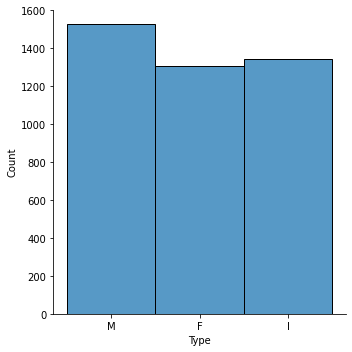

In [ ]:
sea.displot(tabela, x= 'Type')

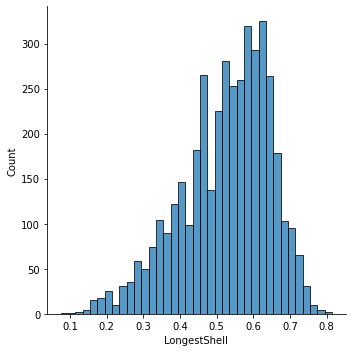

In [ ]:
sea.displot(tabela,x='LongestShell')

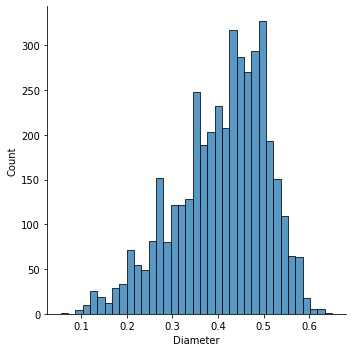

In [ ]:
sea.displot(tabela,x='Diameter')

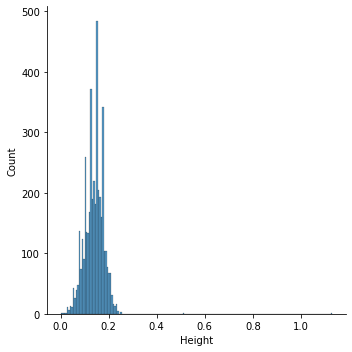

In [ ]:
sea.displot(tabela,x='Height')

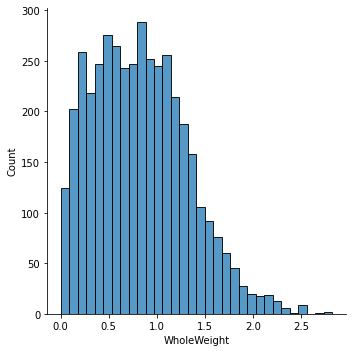

In [ ]:
sea.displot(tabela,x='WholeWeight')

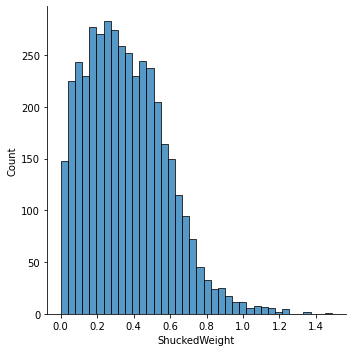

In [ ]:
sea.displot(tabela,x='ShuckedWeight')

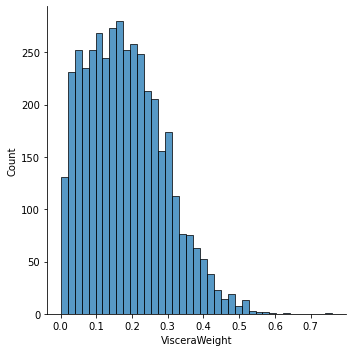

In [ ]:
sea.displot(tabela,x='VisceraWeight')

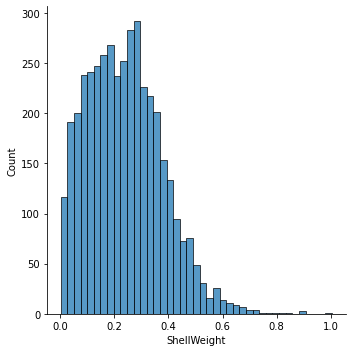

In [ ]:
sea.displot(tabela,x='ShellWeight')

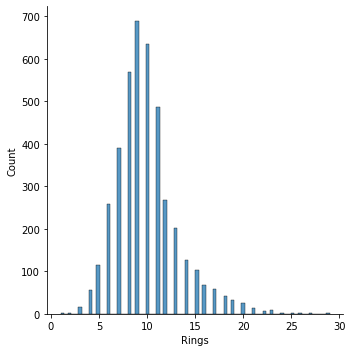

In [ ]:
sea.displot(tabela,x='Rings')

**Cálculo da média, do desvio padrão e da assimetria**

In [ ]:
tabela.mean()

LongestShell     0.523992
Diameter         0.407881
Height           0.139516
WholeWeight      0.828742
ShuckedWeight    0.359367
VisceraWeight    0.180594
ShellWeight      0.238831
Rings            9.933684
dtype: float64

In [ ]:
tabela.std()

LongestShell     0.120093
Diameter         0.099240
Height           0.041827
WholeWeight      0.490389
ShuckedWeight    0.221963
VisceraWeight    0.109614
ShellWeight      0.139203
Rings            3.224169
dtype: float64

In [ ]:
tabela.skew()

LongestShell    -0.639873
Diameter        -0.609198
Height           3.128817
WholeWeight      0.530959
ShuckedWeight    0.719098
VisceraWeight    0.591852
ShellWeight      0.620927
Rings            1.114102
dtype: float64

**QUESTÃO 03**

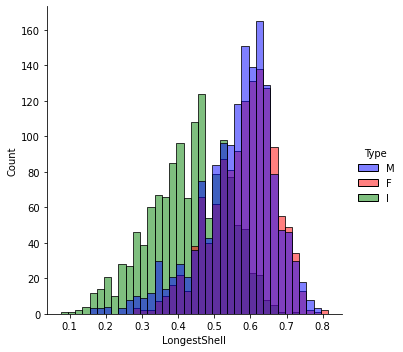

In [ ]:
sea.displot(tabela, x='LongestShell', hue="Type",palette=dict(M='blue', F='red',I='green'))

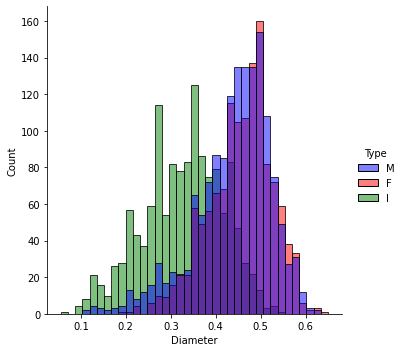

In [ ]:
sea.displot(tabela, x='Diameter', hue="Type",palette=dict(M='blue', F='red',I='green'))

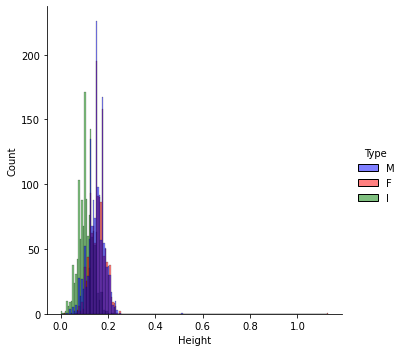

In [ ]:
sea.displot(tabela, x='Height', hue="Type",palette=dict(M='blue', F='red',I='green'))

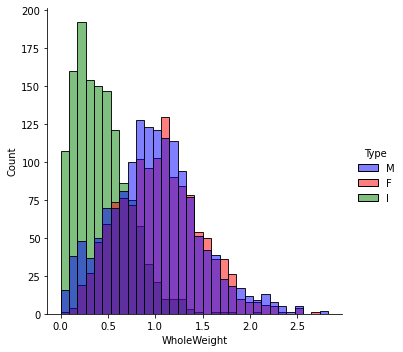

In [ ]:
sea.displot(tabela, x='WholeWeight', hue="Type",palette=dict(M='blue', F='red',I='green'))

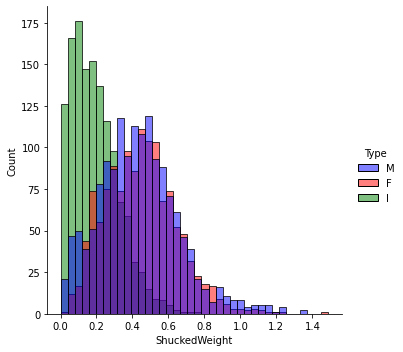

In [ ]:
sea.displot(tabela, x='ShuckedWeight', hue="Type",palette=dict(M='blue', F='red',I='green'))

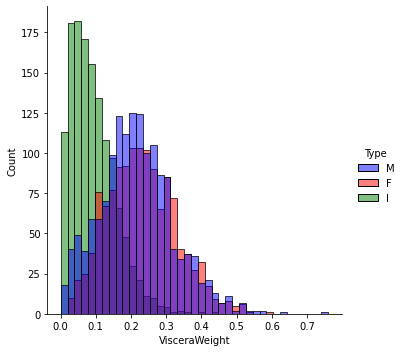

In [ ]:
sea.displot(tabela, x='VisceraWeight', hue="Type",palette=dict(M='blue', F='red',I='green'))

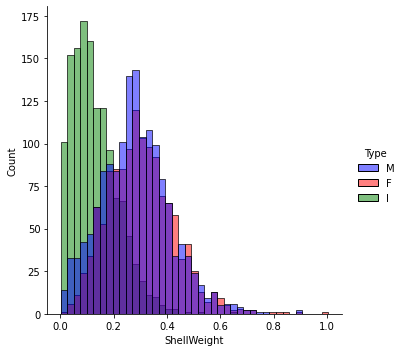

In [ ]:
sea.displot(tabela, x='ShellWeight', hue="Type",palette=dict(M='blue', F='red',I='green'))

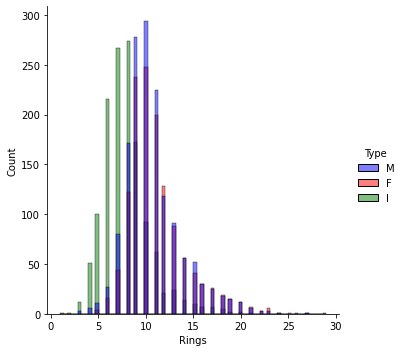

In [ ]:
sea.displot(tabela, x='Rings', hue="Type",palette=dict(M='blue', F='red',I='green'))

In [ ]:
tabela.groupby('Type').std()

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
Type,,,,,,,,
F,0.086160,0.070954,0.039984,0.430316,0.198663,0.097617,0.125649,3.104256
I,0.108858,0.088109,0.031995,0.286275,0.128405,0.062536,0.084927,2.511554
M,0.102697,0.084398,0.034804,0.470581,0.223000,0.104919,0.130834,3.026349


In [ ]:
tabela.groupby('Type').mean()

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
Type,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497


In [ ]:
tabela.groupby('Type').skew()

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
Type,,,,,,,,
F,-0.528735,-0.506289,10.925682,0.368498,0.546770,0.393427,0.691757,1.474022
I,-0.346951,-0.292925,-0.058515,0.974459,0.865294,1.066459,1.001923,1.326831
M,-0.913565,-0.923321,0.417547,0.406007,0.632451,0.506076,0.487628,1.255072


**QUESTÃO 04**

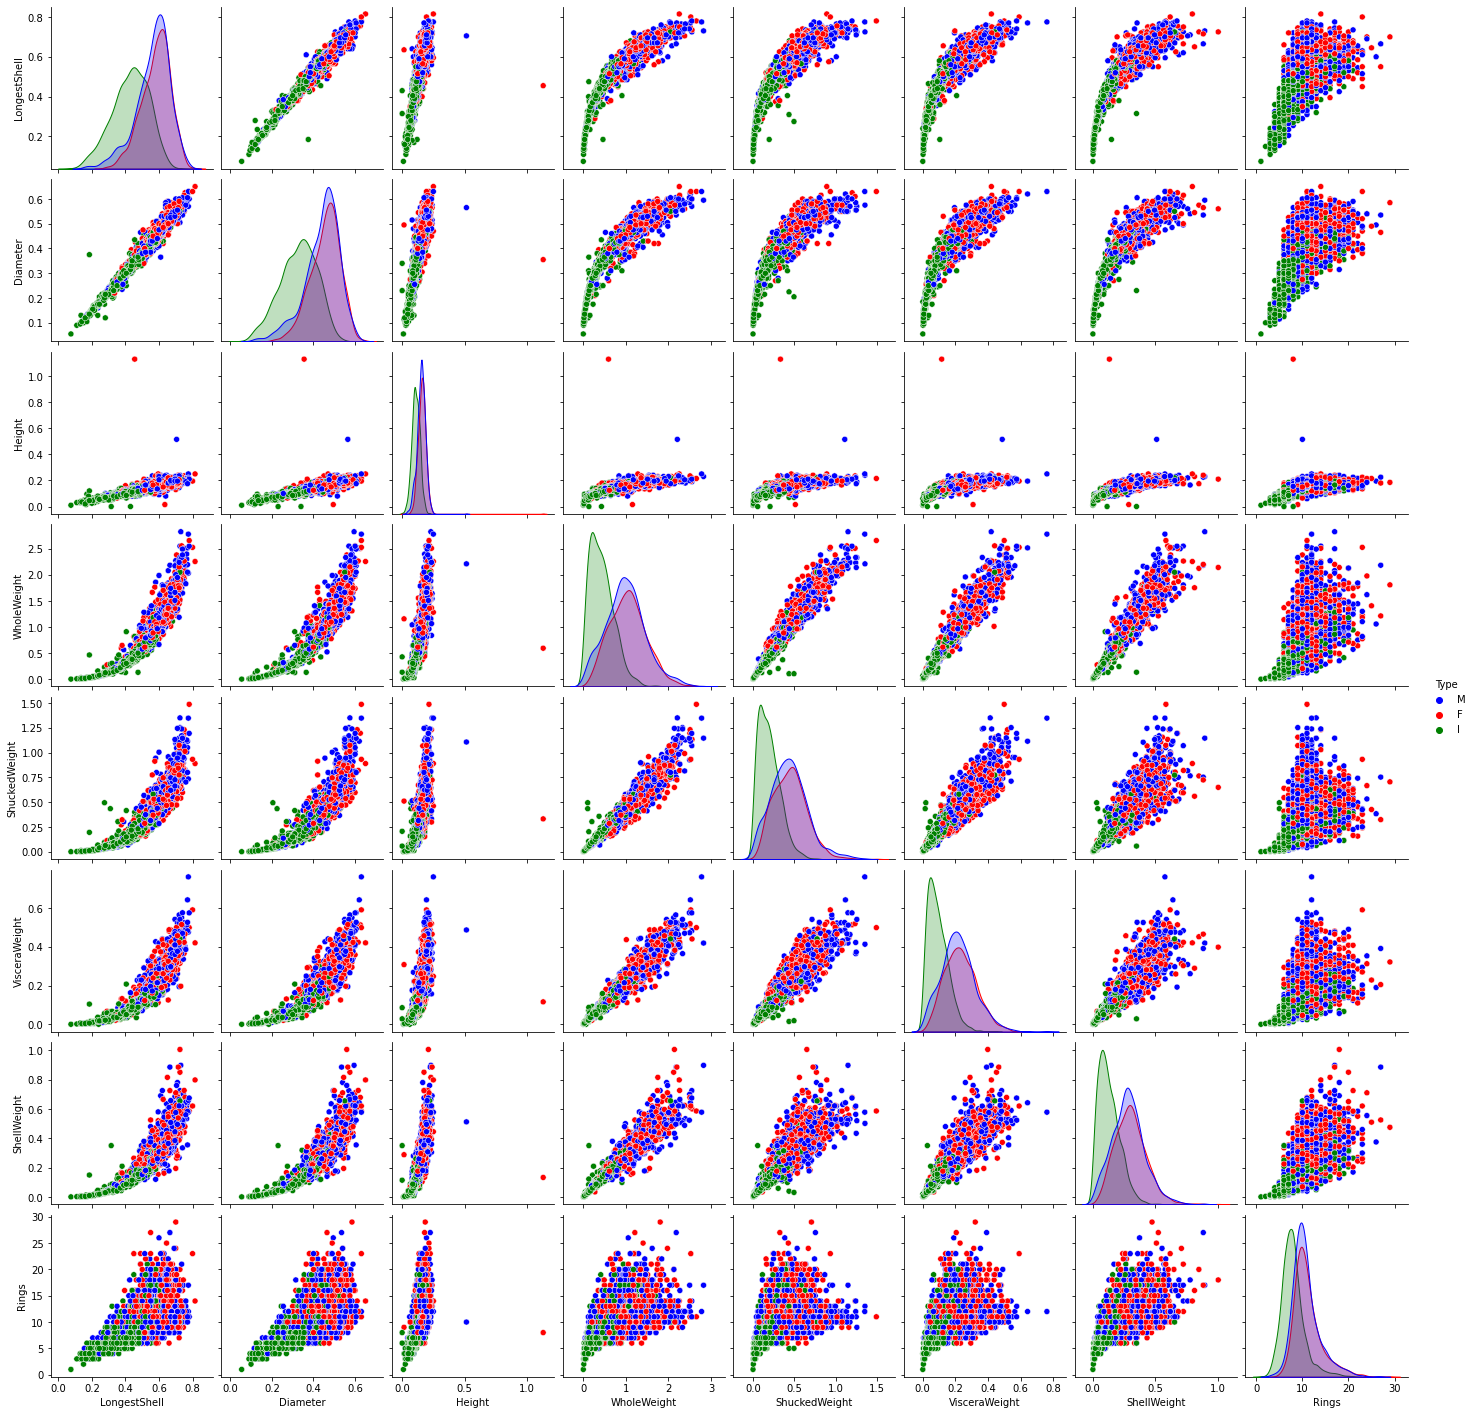

In [ ]:
GridBiVar = sea.pairplot(tabela, hue='Type',palette=dict(M='blue', F='red',I='green'))

In [ ]:
correlacao = tabela.corr()
correlacao.style.set_properties(**{'max-width': '150px', 'font-size': '15px','padding-left':'30px','padding-right':'30px'})\
    .set_precision(3)

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
LongestShell,1.000,0.987,0.828,0.925,0.898,0.903,0.898,0.557
Diameter,0.987,1.000,0.834,0.925,0.893,0.900,0.905,0.575
Height,0.828,0.834,1.000,0.819,0.775,0.798,0.817,0.557
WholeWeight,0.925,0.925,0.819,1.000,0.969,0.966,0.955,0.540
ShuckedWeight,0.898,0.893,0.775,0.969,1.000,0.932,0.883,0.421
VisceraWeight,0.903,0.900,0.798,0.966,0.932,1.000,0.908,0.504
ShellWeight,0.898,0.905,0.817,0.955,0.883,0.908,1.000,0.628
Rings,0.557,0.575,0.557,0.540,0.421,0.504,0.628,1.000


**QUESTÃO 05 - PCA**

      LongestShell  Diameter    Height  WholeWeight  ShuckedWeight  \
PC-0      0.021051  0.017940  0.007316     0.083680       0.029735   
PC-1      0.183053  0.148804  0.052460     0.834461       0.399952   

      VisceraWeight  ShellWeight     Rings  
PC-0       0.017460     0.027431  0.995107  
PC-1       0.183253     0.205272 -0.097937  


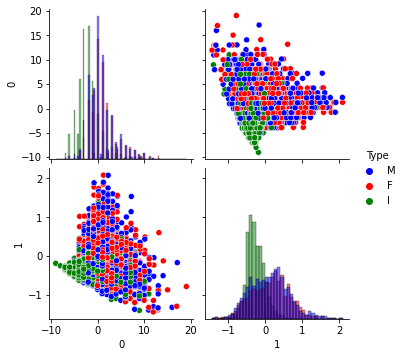

In [ ]:

tabela_sem_tipo = tabela.drop('Type',1)
tabela_pca = PCA(n_components=2)
tabela_pca.fit(tabela_sem_tipo)
result = tabela_pca.transform(tabela_sem_tipo)
#-------------- Loadings -----------------#
pds.set_option('display.max_columns', None)
data_scaled = pds.DataFrame(preprocessing.scale(tabela.drop('Type',1)),columns = tabela.drop('Type',1).columns)
print(pds.DataFrame(tabela_pca.components_,columns=data_scaled.columns,index = ['PC-0','PC-1']))
#-----------------------------------------#
Pds_Result = pds.DataFrame(result)
Pds_Result['Type'] = tabela['Type']
sea.pairplot(Pds_Result, hue='Type', diag_kind='hist', palette=dict(M='blue', F='red',I='green'))